In [1]:
import numpy as np
import timeit            # running time
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #processing data TFIDF
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#load training and test data
news_train=fetch_20newsgroups(subset='train')
news_test=fetch_20newsgroups(subset='test')
#creat train and test labels
trainLabel=news_train.target
testLabel=news_test.target

In [3]:
#Convert text documents into token counts
Count_vector= CountVectorizer()
Count_trainX = Count_vector.fit_transform(news_train.data)
Count_testX = Count_vector.transform(news_test.data)
print(Count_trainX.shape)
print(Count_testX.shape)

(11314, 130107)
(7532, 130107)


In [4]:
#count the number of documents in each class
train_len=[0]*20
test_len=[0]*20
for i in range(0,20):
    train_doc=Count_trainX[trainLabel==i,:]
    test_doc=Count_testX[testLabel==i,:]
    train_len[i]=csr_matrix.getnnz(train_doc)
    test_len[i]=csr_matrix.getnnz(test_doc)

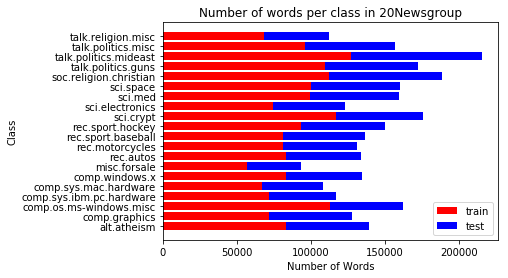

In [5]:
#graph of document in each class
ind = [x for x, _ in enumerate(news_train.target_names)]
plt.barh(ind, train_len,label='train', color='red')
plt.barh(ind, test_len,label='test',color='blue',left=train_len)
plt.yticks(ind,news_train.target_names)
plt.xlabel("Number of Words")
plt.ylabel("Class")
plt.legend(loc="best")
plt.title("Number of words per class in 20Newsgroup")
plt.show()

In [6]:
#define a function of different normalization (use TF-IDF)
def norm(choose,word):
    Tfidf_vector = TfidfVectorizer(norm=choose,stop_words=word)
    trainX= Tfidf_vector.fit_transform(news_train.data)
    testX = Tfidf_vector.transform(news_test.data)
    return trainX,testX;  

In [7]:
#get the normalized dataset (without stopwords)
stop_none,none=norm(None,None)
stop_l1,l1=norm('l1',None)
stop_l2,l2=norm('l2',None)

In [8]:
#MNB(without stopwords)
data=[[stop_none,none],[stop_l1,l1],[stop_l2,l2]]
stop_accuracy=[0]*3
stop_time=[0]*3
for i in range(0,3):
    stop_start = timeit.default_timer()
    stop= MultinomialNB().fit(data[i][0], trainLabel)
    stop_pred=stop.predict(data[i][1])
    stop_accuracy[i]=accuracy_score(testLabel,stop_pred)
    stop_stop = timeit.default_timer()
    stop_time[i]=stop_stop-stop_start
print(stop_accuracy)
print(stop_time)

[0.8064259160913436, 0.6088688263409453, 0.7738980350504514]
[0.42478829899999937, 0.22105761199999563, 0.21565601500000042]


In [9]:
#get the normalized dataset (stopwords='english')
trainX_none,testX_none=norm(None,'english')
trainX_l1,testX_l1=norm('l1','english')
trainX_l2,testX_l2=norm('l2','english')
print(trainX_none.shape)
print(testX_none.shape)

(11314, 129796)
(7532, 129796)


In [10]:
#define a function of different methods
def method(train,test):
    #Multinomial Naive Bayes
    alpha_range=[1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
    MNB_accuracy=[0]*len(alpha_range)
    MNB_time=[0]*len(alpha_range)
    for i in range(len(alpha_range)):
        MNB_start = timeit.default_timer()
        MNB= MultinomialNB(alpha=alpha_range[i]).fit(train, trainLabel)
        MNB_pred=MNB.predict(test)
        MNB_accuracy[i]=accuracy_score(testLabel,MNB_pred)
        MNB_stop = timeit.default_timer()
        MNB_time[i]=MNB_stop-MNB_start
    #KNN
    KNN_accuracy=[]
    KNN_time=[0]*len(range(1,11))
    for k in range(1,11):
        KNN_start = timeit.default_timer()
        nbrs = KNeighborsClassifier(n_neighbors=k)
        mdl=nbrs.fit(train,trainLabel)
        KNN_pred=mdl.predict(test)
        KNN_accuracy.append(accuracy_score(testLabel,KNN_pred))
        KNN_stop = timeit.default_timer()
        KNN_time[k-1]=KNN_stop-KNN_start
    #linear SVM
    SVM_start = timeit.default_timer()
    SVM=svm.SVC(kernel='linear').fit(train,trainLabel)
    SVM_pred=SVM.predict(test)
    SVM_accuracy=accuracy_score(testLabel,SVM_pred)
    SVM_stop = timeit.default_timer()
    SVM_time=SVM_stop-SVM_start
    #Random Forest
    RF_start = timeit.default_timer()
    RF=RandomForestClassifier(n_estimators=100).fit(train,trainLabel)
    RF_pred=RF.predict(test)
    RF_accuracy=accuracy_score(testLabel,RF_pred)
    RF_stop = timeit.default_timer()
    RF_time=RF_stop-RF_start
    return MNB_time,MNB_accuracy,KNN_time,KNN_accuracy,SVM_time,SVM_accuracy,RF_time,RF_accuracy;

In [11]:
MNB_time_original,MNB_accuracy_original,KNN_time_original,KNN_accuracy_original,SVM_time_original,SVM_accuracy_original,RF_time_original,RF_accuracy_original=method(Count_trainX,Count_testX)

In [12]:
MNB_time_none,MNB_accuracy_none,KNN_time_none,KNN_accuracy_none,SVM_time_none,SVM_accuracy_none,RF_time_none,RF_accuracy_none=method(trainX_none,testX_none)

In [13]:
MNB_time_l1,MNB_accuracy_l1,KNN_time_l1,KNN_accuracy_l1,SVM_time_l1,SVM_accuracy_l1,RF_time_l1,RF_accuracy_l1=method(trainX_l1,testX_l1)

In [14]:
MNB_time_l2,MNB_accuracy_l2,KNN_time_l2,KNN_accuracy_l2,SVM_time_l2,SVM_accuracy_l2,RF_time_l2,RF_accuracy_l2=method(trainX_l2,testX_l2)

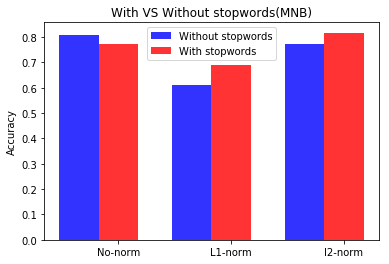

In [15]:
#compare with and without stopwords
n_groups = 3
accuracy =(MNB_accuracy_original[10],MNB_accuracy_l1[10],MNB_accuracy_l2[10])
# create plot
plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.bar(index, stop_accuracy, bar_width,alpha=opacity,color='b',label='Without stopwords')
plt.bar(index + bar_width, accuracy, bar_width,alpha=opacity,color='r',label='With stopwords')
plt.ylabel('Accuracy')
plt.title('With VS Without stopwords(MNB)')
plt.xticks(index + bar_width, ('No-norm', 'L1-norm', 'l2-norm'))
plt.legend()
plt.show()

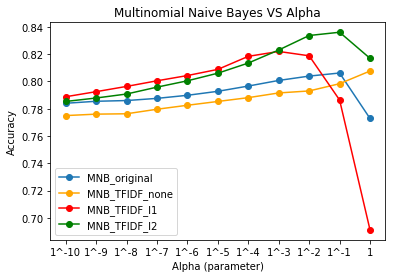

In [16]:
#graph of Multinomial Naive Bayes
xticks = ['1^-10', '1^-9', '1^-8', '1^-7','1^-6','1^-5','1^-4','1^-3','1^-2','1^-1','1']
fig = plt.figure()
plt.title('Multinomial Naive Bayes VS Alpha')
plt.ylabel('Accuracy')
plt.xlabel('Alpha (parameter)')
plt.plot(xticks,MNB_accuracy_original,'o-')
plt.plot(xticks,MNB_accuracy_none,'o-',c='orange')
plt.plot(xticks,MNB_accuracy_l1,'o-',c='red')
plt.plot(xticks,MNB_accuracy_l2,'o-',c='green')
plt.legend(['MNB_original','MNB_TFIDF_none','MNB_TFIDF_l1','MNB_TFIDF_l2'], loc='best')

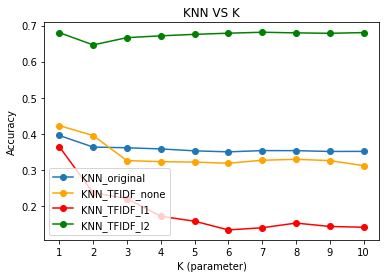

In [17]:
#graph of KNN
xticks = ['1','2','3','4','5','6','7','8','9','10']
fig = plt.figure()
plt.title('KNN VS K')
plt.ylabel('Accuracy')
plt.xlabel('K (parameter)')
plt.plot(xticks,KNN_accuracy_original,'o-')
plt.plot(xticks,KNN_accuracy_none,'o-',c='orange')
plt.plot(xticks,KNN_accuracy_l1,'o-',c='red')
plt.plot(xticks,KNN_accuracy_l2,'o-',c='green')
plt.legend(['KNN_original','KNN_TFIDF_none','KNN_TFIDF_l1','KNN_TFIDF_l2'], loc='best')

In [18]:
#find the maximum value in the MNB and KNN
max_MNB_original,max_MNB_none,max_MNB_l1,max_MNB_l2=max(MNB_accuracy_original),max(MNB_accuracy_none),max(MNB_accuracy_l1),max(MNB_accuracy_l2)
max_KNN_original,max_KNN_none,max_KNN_l1,max_KNN_l2=max(KNN_accuracy_original),max(KNN_accuracy_none),max(KNN_accuracy_l1),max(KNN_accuracy_l2)

In [19]:
accuracy_final=[[max_MNB_original,max_KNN_original,SVM_accuracy_original,RF_accuracy_original],[max_MNB_none,max_KNN_none,SVM_accuracy_none,RF_accuracy_none],[max_MNB_l1,max_KNN_l1,SVM_accuracy_l1,RF_accuracy_l1],[max_MNB_l2,max_KNN_l2,SVM_accuracy_l2,RF_accuracy_l2]]
accuracy_final

[[0.8061603823685608,
  0.3951141795007966,
  0.7336696760488582,
  0.7644715878916623],
 [0.8076208178438662,
  0.42246415294742434,
  0.8009824747742963,
  0.7902283590015932],
 [0.821959638874137,
  0.36404673393520975,
  0.05616038236856081,
  0.7818640467339352],
 [0.8360329261816251,
  0.6816250663834307,
  0.8349707912904939,
  0.7850504514073288]]

In [20]:
#find the corresonding max_accuracy running time
time_final=[[MNB_time_original[9],KNN_time_original[0],SVM_time_original,RF_time_original],[MNB_time_none[10],KNN_time_none[0],SVM_time_none,RF_time_none],[MNB_time_l1[7],KNN_time_l1[0],SVM_time_l1,RF_time_l1],[MNB_time_l2[9],KNN_time_l2[6],SVM_time_l2,RF_time_l2]]
time_final

[[0.22804342200001315, 40.83331676499999, 202.367647416, 111.52171753799996],
 [0.21273036200000206,
  5.5834258840000075,
  159.40465177500005,
  110.72462646400004],
 [0.20108279400005813, 5.68294925500004, 393.44859159500015, 95.6590819590001],
 [0.20431479300009414,
  6.048660460000065,
  247.97257857199997,
  96.78031284000008]]

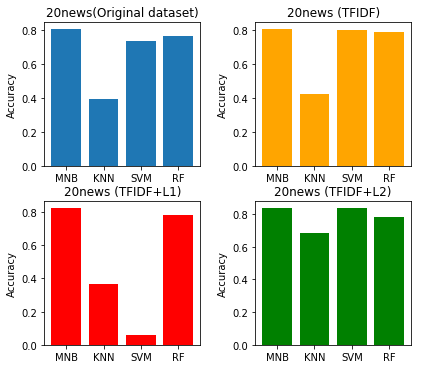

In [21]:
#graph with various document length normalization (accuracy)
plt.figure(1)
x=['MNB','KNN','SVM','RF']
x_pos = [i for i, _ in enumerate(x)]
# Original data
plt.subplot(221)
plt.bar(x_pos, accuracy_final[0])
plt.ylabel("Accuracy")
plt.title("20news(Original dataset)")
plt.xticks(x_pos, x)
# TF-IDF No-nomalization
plt.subplot(222)
plt.bar(x_pos, accuracy_final[1],color='orange')
plt.ylabel("Accuracy")
plt.title("20news (TFIDF)")
plt.xticks(x_pos, x)
# TF-IDF l1-normalization
plt.subplot(223)
plt.bar(x_pos, accuracy_final[2],color='red')
plt.ylabel("Accuracy")
plt.title("20news (TFIDF+L1)")
plt.xticks(x_pos, x)
# TF-IDF l2-normalization
plt.subplot(224)
plt.bar(x_pos, accuracy_final[3],color='green')
plt.ylabel("Accuracy")
plt.title("20news (TFIDF+L2)")
plt.xticks(x_pos, x)
plt.subplots_adjust(top=1.2, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

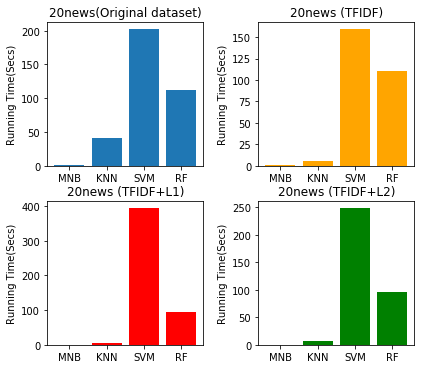

In [22]:
#graph with various document length normalization (running time)
plt.figure(1)
x=['MNB','KNN','SVM','RF']
x_pos = [i for i, _ in enumerate(x)]
# Original data
plt.subplot(221)
plt.bar(x_pos, time_final[0])
plt.ylabel("Running Time(Secs)")
plt.title("20news(Original dataset)")
plt.xticks(x_pos, x)
# TF-IDF No-nomalization
plt.subplot(222)
plt.bar(x_pos, time_final[1],color='orange')
plt.ylabel("Running Time(Secs)")
plt.title("20news (TFIDF)")
plt.xticks(x_pos, x)
# TF-IDF l1-normalization
plt.subplot(223)
plt.bar(x_pos, time_final[2],color='red')
plt.ylabel("Running Time(Secs)")
plt.title("20news (TFIDF+L1)")
plt.xticks(x_pos, x)
# TF-IDF l2-normalization
plt.subplot(224)
plt.bar(x_pos, time_final[3],color='green')
plt.ylabel("Running Time(Secs)")
plt.title("20news (TFIDF+L2)")
plt.xticks(x_pos, x)
plt.subplots_adjust(top=1.2, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()